Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import plotly
from google.colab import files
#from google_play_scraper import app, Sort, reviews_all #*
#from app_store_scraper import AppStore #*



retriving from google play and app store

In [3]:
'''g_reviews = reviews_all(
        "com.instagram.barcelona&hl",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
    )

a_reviews = AppStore('sa', 'threads-an-instagram-app', '1138075747')
a_reviews.review()
'''


'g_reviews = reviews_all(\n        "com.instagram.barcelona&hl",\n        sleep_milliseconds=0, # defaults to 0\n        lang=\'en\', # defaults to \'en\'\n        country=\'us\', # defaults to \'us\'\n        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT\n    )\n\na_reviews = AppStore(\'sa\', \'threads-an-instagram-app\', \'1138075747\')\na_reviews.review()\n'

Importing the dataset

In [4]:
uploaded = files.upload()

Saving threads_reviews.csv to threads_reviews.csv


In [5]:
dataset = pd.read_csv('threads_reviews.csv')
appName = dataset.iloc[:,0].values
reviewList = dataset.iloc[:,1].values
rateList = dataset.iloc[:,2].values

In [6]:
len(dataset)

32910

In [7]:
dataset.shape

(32910, 4)

In [8]:
dataset.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [9]:
dataset.columns
print("the types of the above columns are:")
dataset.dtypes

the types of the above columns are:


source                object
review_description    object
rating                 int64
review_date           object
dtype: object

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [11]:
dataset[dataset.duplicated(subset="review_description")].head()

,source,review_description,rating,review_date
3773,Google Play,It's a good start but they have to add some th...,5,2023-07-07 12:01:14
4516,Google Play,It's a great start! I do feel like when adding...,4,2023-07-07 00:40:24
4604,Google Play,"The user experience so far so good, clean and ...",4,2023-07-12 01:16:11
5938,Google Play,Not working properly,1,2023-07-07 18:52:59
5939,Google Play,Not working properly,1,2023-07-06 05:32:10


In [12]:
dataset.duplicated(subset="review_description").sum()

6204

In [13]:
deduplicated_dataset = dataset.drop_duplicates(subset="review_description")

In [14]:
deduplicated_dataset.duplicated(subset="review_description").sum()

0

In [15]:
len(deduplicated_dataset)

26706

In [16]:
deduplicated_dataset.to_csv("dataset_without_duplicates.csv", index= False)

In [17]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=7c2127f49c1340c8e80bfed454ddda35ca582c9b06895cc1378cc4d7aa717b61
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [18]:
from langdetect import detect

# Function to check if a text is in English
def is_english(text):
    try:
        return detect(text) == 'en'  # 'en' represents English
    except:
        return False  # Handle potential errors in language detection

# Filter the dataset to keep only English reviews
deduplicated_dataset['is_english'] = deduplicated_dataset['review_description'].apply(is_english)
english_dataset = deduplicated_dataset[deduplicated_dataset['is_english']]

# Remove the 'is_english' column
english_dataset = english_dataset.drop('is_english', axis=1)


<ipython-input-18-de3820da7105>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduplicated_dataset['is_english'] = deduplicated_dataset['review_description'].apply(is_english)


In [19]:
english_dataset.to_csv("english_dataset_without_duplicates.csv", index= False)

In [20]:
len(english_dataset)

20083

In [21]:
import re
import pandas as pd

def remove_emojis_unrelated_chars(text):
    # Remove emojis (including Unicode emojis)
    text = re.sub('[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # Remove usernames (mentions)
    text = re.sub(r'@\w+', '', text)
    # Remove isolated letters
    text = re.sub(r'\b\w\b', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Replace @username with an empty string
    text = re.sub('@[^\s]+', ' ', text)
    # Remove underscores
    text = re.sub('[_]', ' ', text)
    return text

without_emoji_dataset = english_dataset.copy()
# Apply the function to the 'review_description' column
without_emoji_dataset['review_description'] = without_emoji_dataset['review_description'].apply(remove_emojis_unrelated_chars)

# Save the new dataset to a CSV file
without_emoji_dataset.to_csv("without_emoji_dataset.csv", index=False)


In [22]:
len(without_emoji_dataset)

20083

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

ar_stops = set(stopwords.words('english'))
stopwords_list = {"now", "should", "both", "each", "few", "more", "most", "other", "some", "such",
                  "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t",
                  "can", "will", "just", "don", 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
                  'you', 'your', 'yours', 'yourself', 'yourselves',
                  'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
                  'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
                  'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
                  'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
                  'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
                  'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
                  'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                  'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there',
                  'when', 'where', 'why', 'how', 'all', 'any'}

def remove_stopwords(text):
    words = TextBlob(text).words
    clean_words = [word for word in words if word.lower() not in ar_stops
                   and word.lower() not in stopwords_list and len(word) >= 2]
    text=' '.join(clean_words)

    return text

without_stopwords_dataset = without_emoji_dataset.copy()

# Apply the remove_stopwords function to the 'review_description' column in the copied dataset
without_stopwords_dataset['review_description'] = without_stopwords_dataset['review_description'].apply(remove_stopwords)

# remove rows with empty 'review_description' columns in the copied dataset
without_stopwords_dataset = without_stopwords_dataset[without_stopwords_dataset['review_description'] != '']

# Save the new dataset to a CSV file
without_stopwords_dataset.to_csv("without_stopwords_dataset.csv", index=False)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
len(without_stopwords_dataset)

20051

In [25]:

import re
import pandas as pd

def remove_punctuation(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    return text


# Filter the dataset to keep only English reviews withou emojis
without_punctuation_dataset = without_stopwords_dataset.copy()
without_punctuation_dataset['review_description'] = without_punctuation_dataset['review_description'].apply(remove_punctuation)
without_punctuation_dataset = without_punctuation_dataset[without_punctuation_dataset['review_description'].str.encode('ascii', 'ignore').str.decode('ascii') == without_punctuation_dataset['review_description']]
without_punctuation_dataset.to_csv("clean_reviews.csv", index=False)
clean_dataset = without_punctuation_dataset.copy()

In [26]:
len(without_punctuation_dataset)

20009

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report, fbeta_score, accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, make_scorer

In [28]:
# Map ratings to sentiment labels (example mapping, adjust as needed)
clean_dataset['sentiment'] = clean_dataset['rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative' if x < 3 else 'Neutral')


In [29]:
clean_dataset.to_csv("clean_reviews.csv", index=False)

In [30]:
clean_dataset.shape

(20009, 5)

In [31]:
clean_dataset.columns

Index(['source', 'review_description', 'rating', 'review_date', 'sentiment'], dtype='object')

In [32]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20009 entries, 0 to 32909
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              20009 non-null  object
 1   review_description  20009 non-null  object
 2   rating              20009 non-null  int64 
 3   review_date         20009 non-null  object
 4   sentiment           20009 non-null  object
dtypes: int64(1), object(4)
memory usage: 937.9+ KB


In [33]:
clean_dataset.describe()

,rating
count,20009.000000
mean,3.036683
std,1.739380
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,5.000000


In [34]:
clean_dataset.var(numeric_only=True)

rating    3.025444
dtype: float64

In [35]:
clean_dataset.describe(include=['object'])

,source,review_description,review_date,sentiment
count,20009,20009,20009,20009
unique,2,18756,19548,3
top,Google Play,good app,2023-07-06 14:22:03,Positive
freq,17475,47,3,9348


In [36]:
clean_dataset["sentiment"].value_counts()

Positive    9348
Negative    8600
Neutral     2061
Name: sentiment, dtype: int64

In [37]:
countVector = CountVectorizer()
word_count_vector = countVector.fit_transform(clean_dataset['review_description'].values.astype('U'))
word_count_vector.shape

(20009, 11990)

In [38]:
tfidf = TfidfTransformer(smooth_idf = True , use_idf = True)
tfidf.fit(word_count_vector)
TfidfTransformer()

TfidfTransformer()

In [39]:
dfidf =pd.DataFrame(tfidf.idf_,index=countVector.get_feature_names_out() , columns = ['idf_weights'])

In [40]:
dfidf.sort_values(by = ['idf_weights']).head(15)

,idf_weights
app,2.011926
twitter,2.530665
instagram,3.075949
like,3.127872
threads,3.141817
good,3.182196
account,3.683614
better,3.712558
see,3.771490
people,3.773889


In [41]:
dfidf.sort_values(by = ['idf_weights']).tail(15)

,idf_weights
opted,10.21084
oppo,10.21084
dowload,10.21084
opsn,10.21084
opsan,10.21084
oppressor,10.21084
oppressive,10.21084
opposition,10.21084
dowloading,10.21084
downed,10.21084


In [42]:
clean_dataset.to_csv("clean_dataset.csv", index=False)

In [43]:
# remove data with NAN sentiment
clean_dataset = clean_dataset[~clean_dataset["sentiment"].isna()]
clean_dataset = clean_dataset[~clean_dataset["review_description"].isna()]

In [44]:
# remove the "Neutral" class
clean_dataset = clean_dataset[clean_dataset['sentiment'] != "Neutral"]

In [45]:
clean_dataset.to_csv("clean_dataset.csv", index=False)

In [46]:
# change values to numeric
clean_dataset['sentiment'] = clean_dataset['sentiment'].map({'Negative' : 0, 'Positive' : 1})

In [47]:
X = clean_dataset['review_description']
y = clean_dataset['sentiment']

In [48]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
unbalanced_tfidf = TfidfVectorizer()
unbalanced_X = unbalanced_tfidf.fit_transform(X)
unbalanced_X.shape

(17948, 11234)

In [49]:
unbalanced_X

<17948x11234 sparse matrix of type '<class 'numpy.float64'>'
	with 151593 stored elements in Compressed Sparse Row format>

In [50]:
# Training Phase
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(unbalanced_X, y, test_size=0.25, random_state=40)

In [51]:
print("Training set has {} samples.".format(X_train_unbalanced.shape[0]))
print("Testing set has {} samples.".format(X_test_unbalanced.shape[0]))

Training set has 13461 samples.
Testing set has 4487 samples.


In [52]:
balanced_tfidf = TfidfVectorizer()
balanced_tfidf.fit(X)

TfidfVectorizer()

In [53]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X , y , test_size = 0.25, random_state = 40)

In [54]:
print("Training set has {} samples.".format(X_train_balanced.shape[0]))
print("Testing set has {} samples.".format(X_test_balanced.shape[0]))

Training set has 13461 samples.
Testing set has 4487 samples.


In [55]:
X_train_balanced =balanced_tfidf.transform(X_train_balanced)
X_test_balanced = balanced_tfidf.transform(X_test_balanced)
balanced_X = balanced_tfidf.transform(X)
X_train_balanced

<13461x11234 sparse matrix of type '<class 'numpy.float64'>'
	with 114152 stored elements in Compressed Sparse Row format>

In [56]:
ros = RandomOverSampler(random_state=40)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_balanced,y_train_balanced)

In [57]:
print("Data before balence: {} samples.".format(y_train_unbalanced.value_counts()[0]))
print("Data before balance: {} samples.".format(y_train_unbalanced.value_counts()[1]))

Data before balence: 6479 samples.
Data before balance: 6982 samples.


In [58]:
print("Data after balance: {} samples.".format(y_train_balanced.value_counts()[0]))
print("Data after balance: {} samples.".format(y_train_balanced.value_counts()[1]))

Data after balance: 6982 samples.
Data after balance: 6982 samples.



Confusion Matrix - Naive Bayes (Unbalanced) Training
Accuracy Report
Model Accuracy: 0.90
10-Fold Cross Validation: 0.85
Training Score: 0.90
Testing Score: 0.86


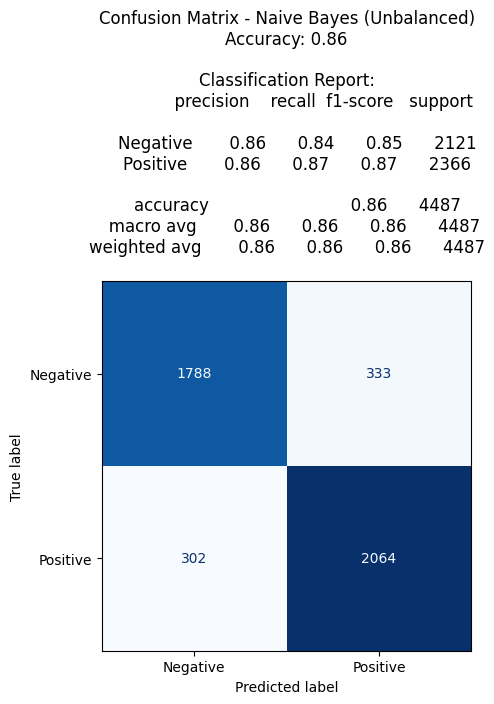


Confusion Matrix - Logistic Regression (Unbalanced) Training
Accuracy Report
Model Accuracy: 0.90
10-Fold Cross Validation: 0.85
Training Score: 0.90
Testing Score: 0.86


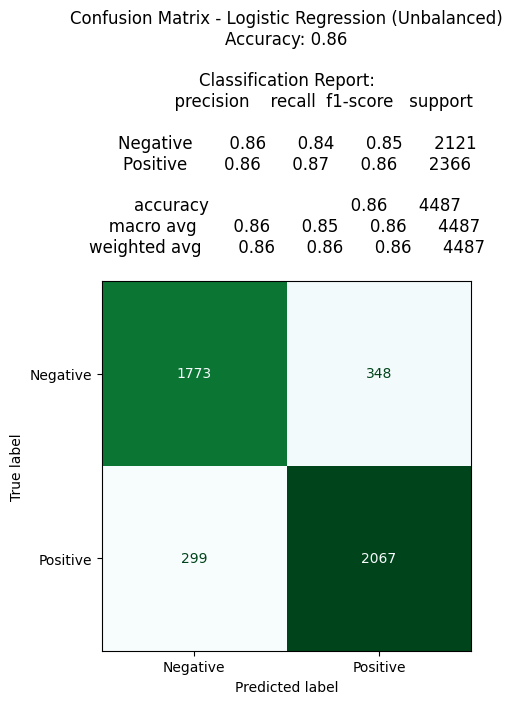


Confusion Matrix - Naive Bayes (Balanced) Training
Accuracy Report
Model Accuracy: 0.90
10-Fold Cross Validation: 0.85
Training Score: 0.90
Testing Score: 0.85


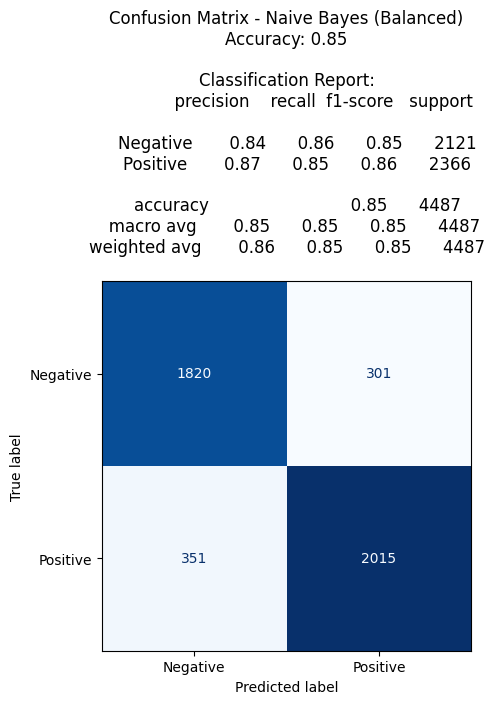


Confusion Matrix - Logistic Regression (Balanced) Training
Accuracy Report
Model Accuracy: 0.90
10-Fold Cross Validation: 0.85
Training Score: 0.90
Testing Score: 0.86


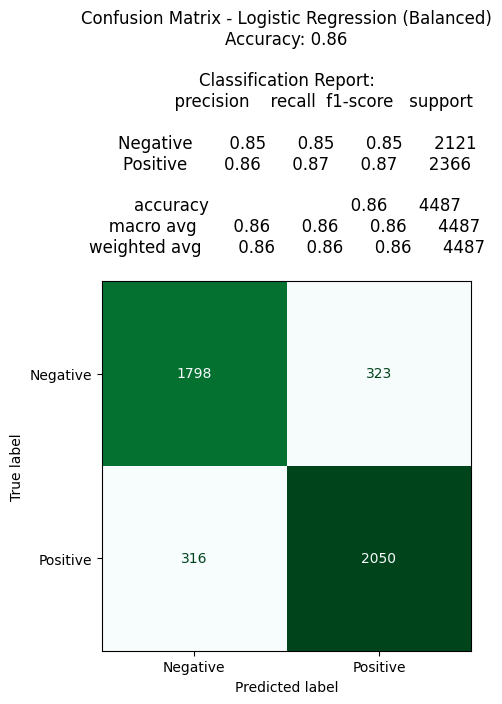

In [59]:

def plot_confusion_matrix(model, X_test, y_test, title, color):

    # Print accuracy information
    print_accuracy_info(model, X_train_unbalanced, y_train_unbalanced, X_test_unbalanced, y_test_unbalanced, title)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    display.plot(cmap=color, values_format='d', colorbar=False)
    plt.title(f'{title}\nAccuracy: {accuracy:.2f}\n\nClassification Report:\n{classification_rep}')
    plt.show()

# Function to print accuracy information
def print_accuracy_info(model, X_train, y_train, X_test, y_test, title):
    # Training accuracy
    train_accuracy = model.score(X_train, y_train)

    # 10-fold cross-validation accuracy
    cross_val_scores = cross_val_score(model, X_train, y_train, cv=10)
    cross_val_accuracy = cross_val_scores.mean()

    # Testing accuracy
    test_accuracy = model.score(X_test, y_test)

    # Print information
    print(f'\n{title} Training')
    print('Accuracy Report')
    print(f'Model Accuracy: {train_accuracy:.2f}')
    print(f'10-Fold Cross Validation: {cross_val_accuracy:.2f}')
    print(f'Training Score: {train_accuracy:.2f}')
    print(f'Testing Score: {test_accuracy:.2f}')

# Naive Bayes for Unbalanced Data
naive_bayes_model_unbalanced = MultinomialNB()
naive_bayes_model_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)

# Logistic Regression for Unbalanced Data
logistic_regression_model_unbalanced = LogisticRegression(C=1.0, max_iter=3000)
logistic_regression_model_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)

# Naive Bayes for Balanced Data
naive_bayes_model_balanced = MultinomialNB()
naive_bayes_model_balanced.fit(X_train_balanced, y_train_balanced)

# Logistic Regression for Balanced Data
logistic_regression_model_balanced = LogisticRegression(C=1.0, max_iter=3000)
logistic_regression_model_balanced.fit(X_train_balanced, y_train_balanced)

# Plot Confusion Matrices with Details and Accuracy
plot_confusion_matrix(naive_bayes_model_unbalanced, X_test_unbalanced, y_test_unbalanced, 'Confusion Matrix - Naive Bayes (Unbalanced)', 'Blues')
plot_confusion_matrix(logistic_regression_model_unbalanced, X_test_unbalanced, y_test_unbalanced, 'Confusion Matrix - Logistic Regression (Unbalanced)', 'BuGn')
plot_confusion_matrix(naive_bayes_model_balanced, X_test_balanced, y_test_balanced, 'Confusion Matrix - Naive Bayes (Balanced)', 'Blues')
plot_confusion_matrix(logistic_regression_model_balanced, X_test_balanced, y_test_balanced, 'Confusion Matrix - Logistic Regression (Balanced)', 'BuGn')


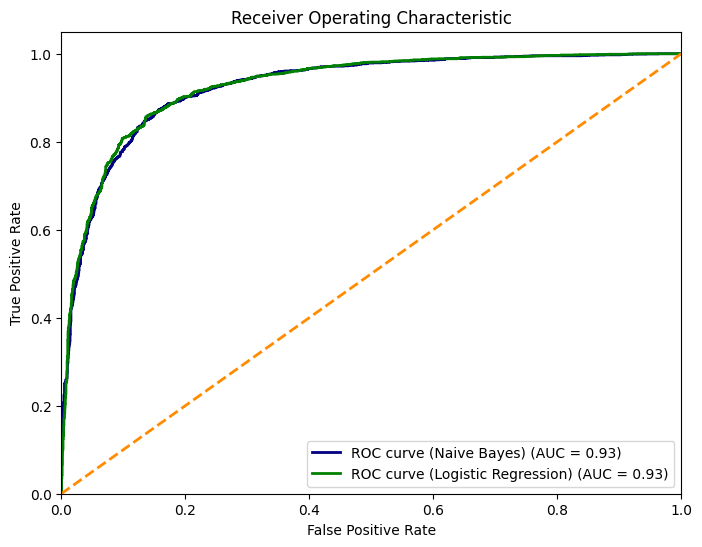

In [60]:
# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_balanced, y_train_balanced)

# Logistic Regression
logistic_regression_model = LogisticRegression(C=1.0, max_iter=3000)
logistic_regression_model.fit(X_train_balanced, y_train_balanced)

# Generate ROC for Naive Bayes
y_score_nb = naive_bayes_model.predict_proba(X_test_balanced)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_balanced, y_score_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Generate ROC for Logistic Regression
y_score_lr = logistic_regression_model.predict_proba(X_test_balanced)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_balanced, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='navy', lw=2, label='ROC curve (Naive Bayes) (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='ROC curve (Logistic Regression) (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [61]:
# data = pd.read_csv('clean_reviews.csv')

In [62]:
import pandas as pd
# Load the dataset from CSV
clean_reviews = pd.read_csv('clean_reviews.csv')
# Calculate the value counts of the 'rating' column
classification_report = clean_reviews['sentiment'].value_counts()

<Axes: ylabel='sentiment'>

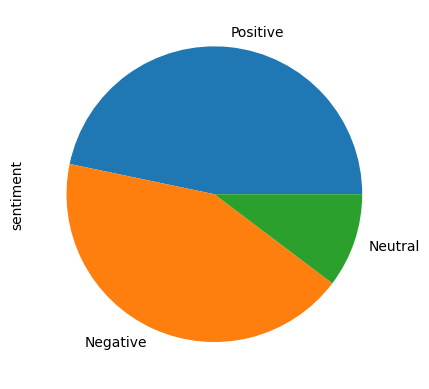

In [63]:
classification_report.plot(kind="pie")

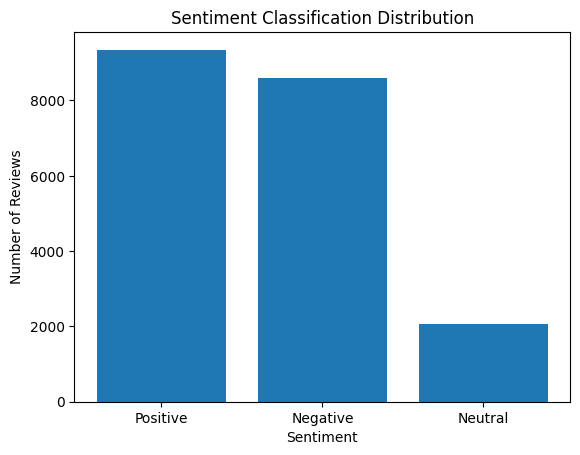

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('clean_reviews.csv')

# Count the number of reviews for each sentiment classification
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Set the labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Classification Distribution')

# Show the bar chart
plt.show()

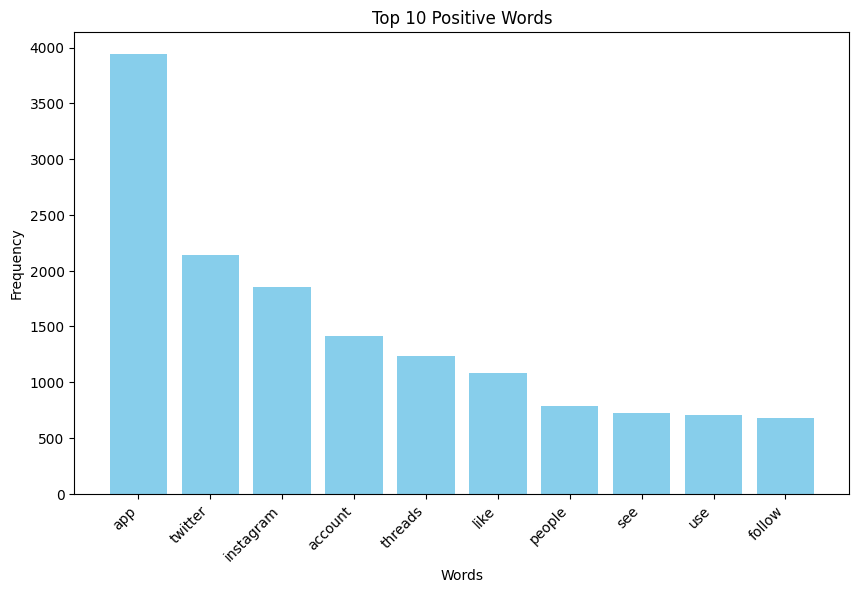

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('clean_reviews.csv')
positive_reviews = df[df['sentiment'] == 'Positive']['review_description']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_reviews)

word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()

word_counts_df = pd.DataFrame({'word': feature_names, 'count': word_counts.flat})
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)
top_n_words = 10
top_words_df = word_counts_df.head(top_n_words)

plt.figure(figsize=(10, 6))
plt.bar(top_words_df['word'], top_words_df['count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Positive Words'.format(top_n_words))
plt.xticks(rotation=45, ha='right')
plt.show()


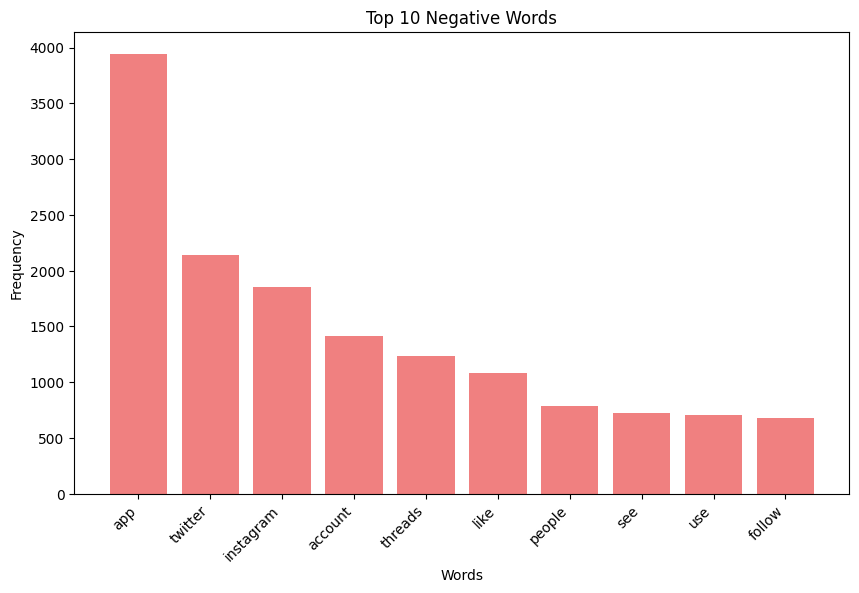

In [66]:

negative_reviews = df[df['sentiment'] == 'Negative']['review_description']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_reviews)

word_counts = X.sum(axis=0)

feature_names = vectorizer.get_feature_names_out()

word_counts_df = pd.DataFrame({'word': feature_names, 'count': word_counts.flat})
word_counts_df = word_counts_df.sort_values(by='count', ascending=False)

top_words_df = word_counts_df.head(top_n_words)

plt.figure(figsize=(10, 6))
plt.bar(top_words_df['word'], top_words_df['count'], color='lightcoral')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Negative Words'.format(top_n_words))
plt.xticks(rotation=45, ha='right')
plt.show()


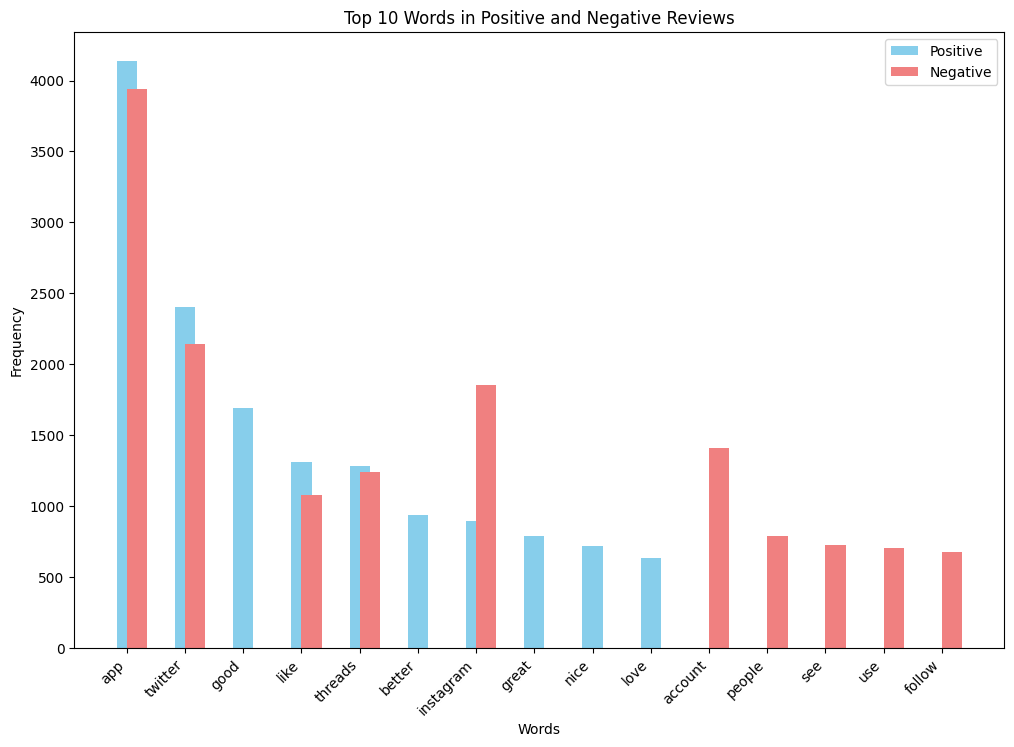

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('clean_reviews.csv')
top_n_words = 10

# Positive reviews
positive_reviews = df[df['sentiment'] == 'Positive']['review_description']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(positive_reviews)

word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()

word_counts_df_pos = pd.DataFrame({'word': feature_names, 'count_pos': word_counts.flat})
word_counts_df_pos = word_counts_df_pos.sort_values(by='count_pos', ascending=False)
top_words_df_pos = word_counts_df_pos.head(top_n_words)

# Negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']['review_description']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(negative_reviews)

word_counts = X.sum(axis=0)
feature_names = vectorizer.get_feature_names_out()

word_counts_df_neg = pd.DataFrame({'word': feature_names, 'count_neg': word_counts.flat})
word_counts_df_neg = word_counts_df_neg.sort_values(by='count_neg', ascending=False)
top_words_df_neg = word_counts_df_neg.head(top_n_words)

# Merge dataframes on the 'word' column
merged_df = pd.merge(top_words_df_pos, top_words_df_neg, on='word', how='outer').fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['count_pos'], width=bar_width, color='skyblue', label='Positive')
plt.bar(index, merged_df['count_neg'], width=bar_width, color='lightcoral', label='Negative', align='edge')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Words in Positive and Negative Reviews'.format(top_n_words))
plt.xticks(index, merged_df['word'], rotation=45, ha='right')
plt.legend()
plt.show()
